In [1]:
from google.colab import drive
drive.mount('/content/grdive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/grdive


In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [0]:
X=np.array([[1,2],
          [1.5,1.8],
          [5,8],
          [8,8],
          [1,0.6],
          [9,11]])

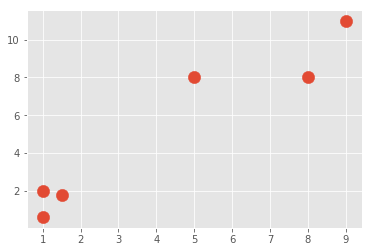

In [4]:
plt.scatter(X[:,0] , X[:,1], s=150)
plt.show()

In [0]:
colors=10*["g","r","c","b","k"]

In [0]:
class K_Means:
  def __init__(self,k=2,tol=0.001,max_iter=300):
    self.k=k
    self.tol=tol
    self.max_iter=max_iter
  
  def fit(self,data):
    self.centroids = {}
    
    for i in range(self.k):
      self.centroids[i]=data[i] #initially the 1st two data points are considered as centroids
     
    for i in range(self.max_iter):
      self.classifications={}
      
      for i in range(self.k):
        self.classifications[i]=[]
      
      
      for featureset in X:   #SHOULD BE data not X
        distances=[np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification=distances.index(min(distances))
        self.classifications[classification].append(featureset)
        
      
      prev_centroids=dict(self.centroids)
      
      for classification in self.classifications:
       
        self.centroids[classification] = np.average(self.classifications[classification], axis=0)
      
      optimized=True
      
      for c in self.centroids:
        original_centroid = prev_centroids[c]
        current_centroid=self.centroids[c]
        if np.sum((current_centroid-original_centroid)/original_centroid *100.0)> self.tol:
          optimized=False
      
      if optimized:
        break
        
  
  def predict(self,data):
    distances=[np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
    classification = distances.index(min(distances))
    return classification
  

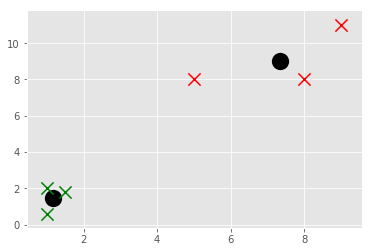

In [24]:
clf=K_Means()
clf.fit(X)

for centroid in clf.centroids:
  plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker="o",color="k",s=150,linewidths=5)

for classification in clf.classifications:
  color=colors[classification]
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

In [0]:
unknowns=np.array([[1,3],[8,9],[0,3],[5,4],[6,4],])

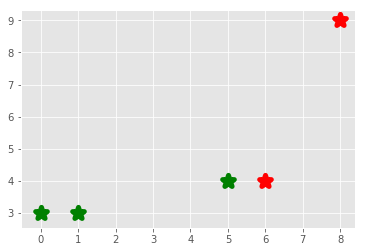

In [27]:
for unknown in unknowns:
  classification=clf.predict(unknown)
  plt.scatter(unknown[0], unknown[1], marker="*",color=colors[classification],s=150, linewidths=5)